#### Introduction of both problems:

1. Monty Hall problem 

"Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?" Parade magazine in 1990

2. Monty Fall variant

"The host does not know what lies behind the doors, and opens one at random that happens not to reveal the car"


Source: https://en.wikipedia.org/wiki/Monty_Hall_problem

#### 1. Monty Hall problem in theory

At the beginning, giving initial settings for this problem we have 1/3 chance of selecting a Car.

$$ P(C_{1}) = 1/3, P(C_{2}) = 1/3, P(C_{3}) = 1/3 $$ 
where $C_{i}$  - event that the Car is in $ i $

Lets say the contestant chooses the 1st door, now what is the probability that the host will open Door 3, given that the prize is behind either door 1,2 or 3.

$$ P(O_{3}|C_{1}) = 1/2, P(O_{3}|C_{2}) = 1 , P(O_{3}|C_{3}) = 0 $$
where $O_{i}$  - event that the host opens door $ i $

Now that we have understood the reasoning, lets check the optimal strategy. Suppose that in this example the host opens door 3. Door 3 doesn’t have the prize, now how sure can we be that door 2 has the prize?

To calculate conditional probabilities Bayesian Rule is used. Bayesian Theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

$$ P(A_{i}|B) = \frac{P(B|A_{i})P(A_{i})}{P(B) }  = \frac{P(B|A_{i})P(A_{i})}{\sum \limits _{j} P(B|A_{j})P(A_{j}) } $$

P(A|B) — is the probability of A given that B has already happened.
P(B|A) — is the probability of B given that A has already happened. 
P(A) — is the unconditional probability of A occurring.
P(B) — is the unconditional probability of B occurring.


$$ P(C_{2}|O_{3}) = \frac{P(O_{3}|C_{2})P(C_{2})}{P(O_{3}|C_{1})P(C_{1}) + P(O_{3}|C_{2})P(C_{2}) + P(O_{3}|C_{3})P(C_{3}) } =   \frac{(1)(\frac{1}{3})}{(\frac{1}{2})(\frac{1}{3}) + (1)(\frac{1}{3}) + (0)(\frac{1}{3}) } = \frac{2}{3} $$

If we had remained with door 1 in this scenario:

$$ P(C_{1}|O_{3}) = \frac{P(O_{3}|C_{1})P(C_{1})}{P(O_{3}|C_{1})P(C_{1}) + P(O_{3}|C_{2})P(C_{2}) + P(O_{3}|C_{3})P(C_{3}) } =   \frac{(\frac{1}{2})(\frac{1}{3})}{(\frac{1}{2})(\frac{1}{3}) + (1)(\frac{1}{3}) + (0)(\frac{1}{3}) } = \frac{1}{3} $$

#### 2. Monty Hall problem - simulation of the optimal strategy

Total time for Loop   2.5781400203704834


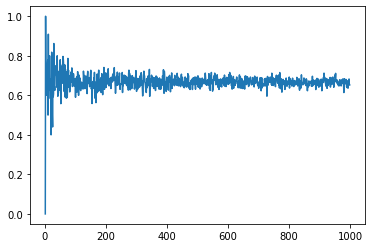

In [29]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from time import time
import random

ac = []
tc = []
N = []

start_time = time()

total_no_of_simulations = 1000

sym_com = False

# double loop construction let the us to see how the probabilities are converging at value of 2/3 for seperate experiments

for no_of_games in range(1, total_no_of_simulations):
    score = []
    runs = 0
    door_set = {1,2,3}
    for K in range(1,no_of_games): # sub loop that simulates from 1 to no_of_games games
        
        ##initial settings:
        not_to_open_doors = set()
        host_doors = door_set.copy()
        player_doors = door_set.copy()
        if sym_com:
            print('New game iteration started - iteration ', K )
        
        #Randomly choose as answer which host knows
        prize_door = random.choice(tuple(host_doors))
        if sym_com:
            print('Prize door selected - ', prize_door)
        not_to_open_doors.add(prize_door) # Host knows not to open this door
        
        #Randomly choose contestant pick
        players_choice = random.choice(tuple(player_doors)) # Contestants random guess
        if sym_com:
            print('Players door selected - ', players_choice)
            
        not_to_open_doors.add(players_choice)
        host_doors.difference_update(not_to_open_doors)
        
        #if host has a choice, pick one at random and remove from choice for the Contestant
        host_elimination = random.choice(tuple(host_doors))
        if sym_com:
            print('Host has open a door with a goat - ', host_elimination)
        player_doors.remove(host_elimination)
        #player following optimal strategy will always change primary choice
        player_doors.remove(players_choice)
        
        # check if player has only one door to choose
        if not len(player_doors) == 1:
            print('Error! More than one choice')
        #print ("final answe",player)
        
        # get final choice fromt he set
        (final_choice,) = player_doors #= next(iter(player_doors)) 
        if sym_com:
            print('Player has switched the choice for door no - ', final_choice)
        if final_choice == prize_door:
            score.append(1)
            if sym_com:
                print('Player has won a car !')
        else:
            if sym_com:
                print('Player has lost the contest...')
            score.append(0)
        runs = K
        
    ac.append(np.mean(score))
    N.append(no_of_games)
    
end_time = time()
print ("Total time for Loop  ", end_time - start_time )

plt.plot(N,ac)
plt.show()

In [33]:
# show mean score of 10 last simulations
ac[-10:]

[0.6491405460060667,
 0.6383838383838384,
 0.649848637739657,
 0.6733870967741935,
 0.6364551863041289,
 0.6609657947686117,
 0.6613065326633166,
 0.6827309236947792,
 0.6519558676028084,
 0.6523046092184369]

#### 3. Monty Fall problem in theory

To meet asumptions of the Monty Fall variant we have to exclude all trials where Monty opens door with a car. In total there will be 2/3 * 1/2 = 1/3 cases to pass. Contestant has to select a goat in the first place (in previous variant this would assure victory) and then Monty has 50% chance to select a goat. There is 1/3 cases where Monty loses his job. 1/3 when he choses a goat and then aplyer with switching tactics win and 1/3 of cases when contestant switches and chooses a goat. Therefore for the second case, there is no best techniques and keeping original choice or switching gives the same values. 



#### 4. Monty Fall problem - simulation of the different strategies

Total time for Loop   1.9118688106536865


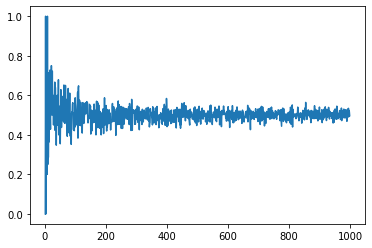

In [36]:
ac = []
tc = []
N = []

start_time = time()

total_no_of_simulations = 1000

sym_com = False

# double loop construction let the us to see how the probabilities are converging at value of 2/3 for seperate experiments

for no_of_games in range(1, total_no_of_simulations):
    void_trial = 0
    score = []
    runs = 0
    door_set = {1,2,3}
    for K in range(1,no_of_games): # sub loop that simulates from 1 to no_of_games games
        
        ##initial settings:
        not_to_open_doors = set()
        host_doors = door_set.copy()
        player_doors = door_set.copy()
        if sym_com:
            print('New game iteration started - iteration ', K )
        
        #Randomly choose as answer which host DOES NOT KNOW
        prize_door = random.choice(tuple(host_doors))
        if sym_com:
            print('Prize door selected - ', prize_door)
        #not_to_open_doors.add(prize_door) # Host DOES NOT KNOW not to open this door
        
        #Randomly choose contestant pick
        players_choice = random.choice(tuple(player_doors)) # Contestants random guess
        if sym_com:
            print('Players door selected - ', players_choice)
            
        not_to_open_doors.add(players_choice)
        host_doors.difference_update(not_to_open_doors)
        
        #if host has a choice, pick one at random and remove from choice for the Contestant
        host_elimination = random.choice(tuple(host_doors))
        if host_elimination == prize_door:
            if sym_com:
                print('Host has chosen a door with a car - ', host_elimination)
            void_trial += 1
            continue
        if sym_com:
            print('Host has open a door with a goat - ', host_elimination)
        player_doors.remove(host_elimination)
        #player following optimal strategy will always change primary choice
        player_doors.remove(players_choice)
        
        # check if player has only one door to choose
        if not len(player_doors) == 1:
            print('Error! More than one choice')
        
        # get final choice from the set
        (final_choice,) = player_doors
        if sym_com:
            print('Player has switched the choice for door no - ', final_choice)
        if final_choice == prize_door:
            score.append(1)
            if sym_com:
                print('Player has won a car !')
        else:
            if sym_com:
                print('Player has lost the contest...')
            score.append(0)
        runs = K
        
    ac.append(np.mean(score))
    N.append(no_of_games)
    
end_time = time()
print ("Total time for Loop  ", end_time - start_time )

plt.plot(N,ac)
plt.show()

In [37]:
ac[-10:]

[0.4686064318529862,
 0.487369985141159,
 0.5288888888888889,
 0.49019607843137253,
 0.5007451564828614,
 0.5342465753424658,
 0.4915254237288136,
 0.5237366003062787,
 0.5167883211678832,
 0.496996996996997]